In [149]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [150]:
# Define parameters
NUM_TRADERS = 500  # Number of traders
INITIAL_CASH = 10000  # Initial cash per trader
INITIAL_STOCKS = 10  # Initial stock holdings per trader
INITIAL_PRICE = 100  # Starting price of stock
TIME_STEPS = 250  # Number of trading steps
SHOCK_PROBABILITY = 0.1  # Probability of a major sentiment shock occurring

In [151]:
# Create a trader network
G = nx.barabasi_albert_graph(NUM_TRADERS, 3)  # Preferential attachment network (some traders more influential)

# Initialize trader attributes
for node in G.nodes():
    G.nodes[node]["cash"] = INITIAL_CASH
    G.nodes[node]["stocks"] = INITIAL_STOCKS
    G.nodes[node]["sentiment"] = random.uniform(-1, 1)  # -1 (bearish) to +1 (bullish)
    G.nodes[node]["strategy"] = random.choice(["buy", "sell", "hold"])  # Initial random strategy
    G.nodes[node]["type"] = random.choice(["momentum", "contrarian", "noise"])  # Different trader behaviors

# Define stock market price
price = INITIAL_PRICE
price_history = [price]

# Trading simulation
for t in range(TIME_STEPS):
    buy_pressure = 0
    sell_pressure = 0
    
    # Random market shock
    if random.random() < SHOCK_PROBABILITY:
        shock_magnitude = random.uniform(-0.5, 0.5)
        for node in G.nodes():
            G.nodes[node]["sentiment"] += shock_magnitude
        print(f"Market Shock at t={t}: Sentiment Shifted by {shock_magnitude:.2f}")

    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        
        # Sentiment update: influenced by neighbors + some personal strategy
        if neighbors:
            avg_neighbor_sentiment = np.mean([G.nodes[n]["sentiment"] for n in neighbors])
            G.nodes[node]["sentiment"] = (G.nodes[node]["sentiment"] + avg_neighbor_sentiment) / 2  # Influence step
        
        # Trader behavior logic
        trader_type = G.nodes[node]["type"]
        
        if trader_type == "momentum":
            # If price increased in last step, follow the trend
            if len(price_history) > 1 and price_history[-1] > price_history[-2]:
                G.nodes[node]["sentiment"] += 0.1
            else:
                G.nodes[node]["sentiment"] -= 0.1

        elif trader_type == "contrarian":
            # If price increased, do the opposite (bet against trend)
            if len(price_history) > 1 and price_history[-1] > price_history[-2]:
                G.nodes[node]["sentiment"] -= 0.1
            else:
                G.nodes[node]["sentiment"] += 0.1

        elif trader_type == "noise":
            # Random changes in sentiment
            G.nodes[node]["sentiment"] += random.uniform(-0.2, 0.2)
        
        # Decision to buy, sell, or hold
        if G.nodes[node]["sentiment"] > 0.5 and G.nodes[node]["cash"] >= price:
            G.nodes[node]["strategy"] = "buy"
            buy_pressure += 1
        elif G.nodes[node]["sentiment"] < -0.5 and G.nodes[node]["stocks"] > 0:
            G.nodes[node]["strategy"] = "sell"
            sell_pressure += 1
        else:
            G.nodes[node]["strategy"] = "hold"

    # Adjust price based on buy/sell imbalance
    if buy_pressure > sell_pressure:
        price *= 1 + (buy_pressure - sell_pressure) / NUM_TRADERS * 0.1  # Increase by buy pressure
    elif sell_pressure > buy_pressure:
        price *= 1 - (sell_pressure - buy_pressure) / NUM_TRADERS * 0.1  # Decrease by sell pressure

    price = max(10, price)  # Prevent price from going negative
    price_history.append(price)


Market Shock at t=8: Sentiment Shifted by -0.19
Market Shock at t=14: Sentiment Shifted by -0.24
Market Shock at t=15: Sentiment Shifted by 0.35
Market Shock at t=38: Sentiment Shifted by -0.21
Market Shock at t=45: Sentiment Shifted by 0.41
Market Shock at t=55: Sentiment Shifted by -0.34
Market Shock at t=58: Sentiment Shifted by -0.21
Market Shock at t=83: Sentiment Shifted by -0.38
Market Shock at t=85: Sentiment Shifted by -0.48
Market Shock at t=103: Sentiment Shifted by -0.30
Market Shock at t=112: Sentiment Shifted by -0.40
Market Shock at t=125: Sentiment Shifted by -0.28
Market Shock at t=128: Sentiment Shifted by 0.19
Market Shock at t=145: Sentiment Shifted by -0.37
Market Shock at t=146: Sentiment Shifted by 0.33
Market Shock at t=147: Sentiment Shifted by -0.07
Market Shock at t=164: Sentiment Shifted by -0.03
Market Shock at t=165: Sentiment Shifted by 0.08
Market Shock at t=182: Sentiment Shifted by -0.41
Market Shock at t=189: Sentiment Shifted by 0.46
Market Shock at 

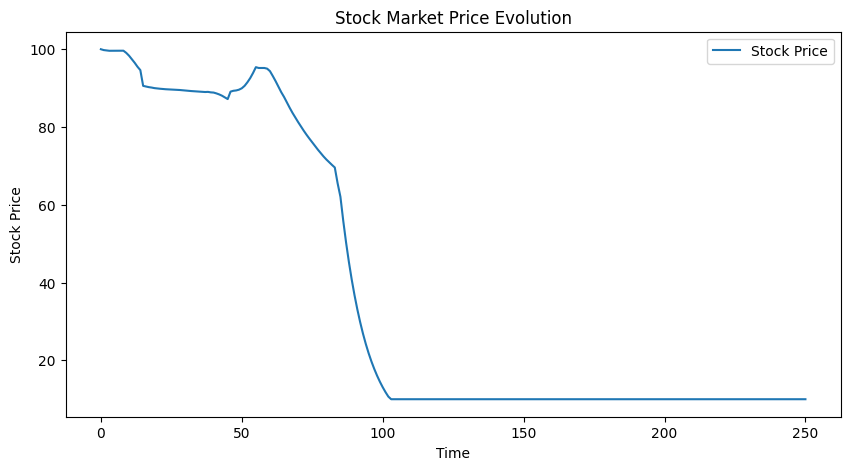

In [152]:
# Plot results
plt.figure(figsize=(10, 5))
plt.plot(price_history, label="Stock Price")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Market Price Evolution")
plt.legend()
plt.show()

In [153]:
price_history

[100,
 99.78,
 99.700176,
 99.600475824,
 99.600475824,
 99.62039591916479,
 99.62039591916479,
 99.62039591916479,
 99.62039591916479,
 99.06252170201746,
 98.32945904142254,
 97.42482801824146,
 96.50903463486999,
 95.48603886774036,
 94.62666451793069,
 90.57664327656326,
 90.41360531866545,
 90.25086082909185,
 90.14255979609695,
 89.9983317004232,
 89.90833336872277,
 89.83640670202779,
 89.76453757666616,
 89.71067885412015,
 89.6747945825785,
 89.63892466474547,
 89.60306909487959,
 89.56722786724164,
 89.51348753052129,
 89.44187674049687,
 89.37032323910447,
 89.316701045161,
 89.24524768432487,
 89.19170053571426,
 89.12034717528569,
 89.08469903641557,
 89.049065156801,
 88.99563571770692,
 89.031233971994,
 88.9065902444332,
 88.85324629028653,
 88.63999849918986,
 88.37407850369229,
 88.03825700537826,
 87.61567337175244,
 87.17759500489367,
 89.09550209500134,
 89.30933130002934,
 89.39864063132936,
 89.59531764071828,
 89.95369891128115,
 90.5833748036601,
 91.5073252266

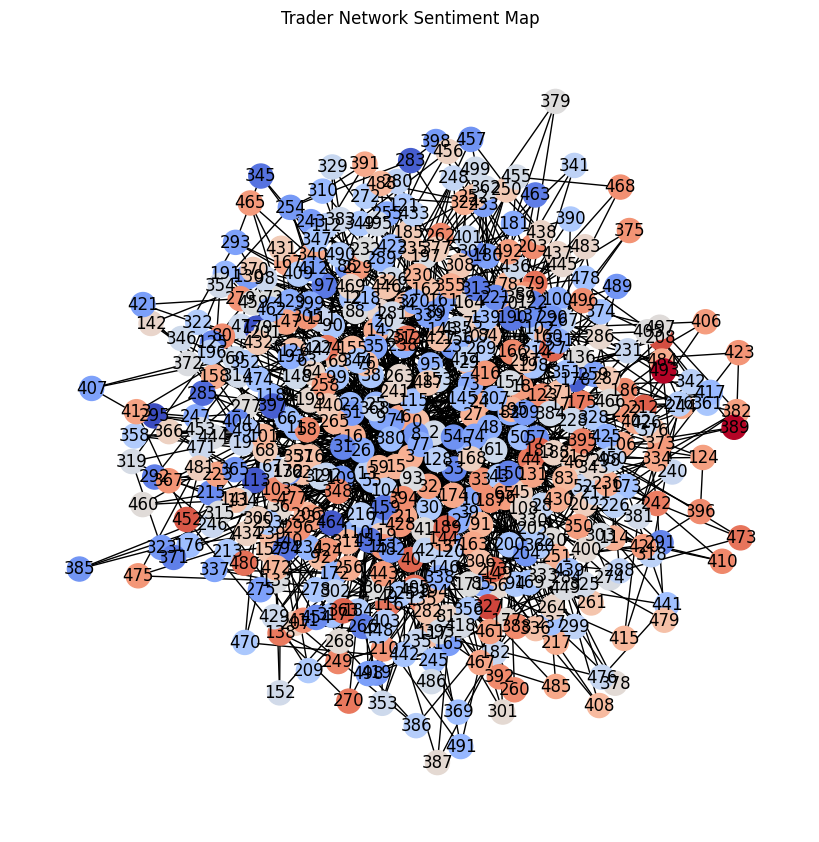

In [154]:
# Visualize trader network with sentiment
node_colors = [G.nodes[n]["sentiment"] for n in G.nodes()]
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_color=node_colors, cmap=plt.cm.coolwarm, node_size=300)
plt.title("Trader Network Sentiment Map")
plt.show()